In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the data file using pandas. 

In [71]:
Gstore=pd.read_csv('googleplaystore.csv')
Gstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


2. Check for null values in the data. Get the number of null values for each column

In [72]:
Gstore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

3.Drop records with nulls in any of the columns. 

In [73]:
Gstore.dropna(inplace=True)

In [74]:
Gstore.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [75]:
Gstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


4. Variables seem to have incorrect type and inconsistent formatting: 

4a -Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

   -Extract the numeric value from the column

   -Multiply the value by 1,000, if size is mentioned in Mb

In [76]:
Gstore['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [77]:
Gstore.iloc[:,4]=Gstore.iloc[:,4].apply(lambda x:float(str(x).replace('M',''))*1000 if 'M'in str(x) else x)
Gstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [78]:
Gstore.iloc[:,4]=Gstore.iloc[:,4].apply(lambda x:float(str(x).replace('k','')) if 'k' in str(x) else x)
Gstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [79]:
Gstore.iloc[:,4]=Gstore.iloc[:,4].apply(lambda x:float(str(x).replace('Varies with device','0')) if 'Varies with device' in str(x) else x)
Gstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


4b. Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [80]:
Gstore['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: object

In [81]:
Gstore['Reviews']=Gstore['Reviews'].apply(lambda x:float(x))

In [82]:
Gstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1023.8+ KB


4c. -Installs field is currently stored as string and has values like 1,000,000+. 

    -Treat 1,000,000+ as 1,000,000

    -remove ‘+’, ‘,’ from the field, convert it to integer

In [83]:
Gstore['Installs']=Gstore['Installs'].apply(lambda x:int(x.replace ('+','').replace(',','')))

In [84]:
Gstore['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: int64

4d. Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric. #To do

In [85]:
Gstore['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [86]:
Gstore.iloc[:,7]=Gstore.iloc[:,7].apply(lambda x:float(str(x).replace ('$','')))

In [87]:
Gstore['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

5. Sanity checks:

5a. Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [88]:
Gstore['Rating'].max()

5.0

In [89]:
Gstore['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

5b. Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [90]:
Gstore=Gstore.drop(Gstore[Gstore['Reviews']>Gstore['Installs']].index)

In [91]:
Gstore[Gstore['Reviews']>Gstore['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [92]:
Gstore.reset_index(drop=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,FR Calculator,FAMILY,4.0,7.0,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9349,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9350,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9351,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


5c. For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [93]:
Gstore[(Gstore['Price']>0)&(Gstore['Type']=='Free')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are no rows to drop

In [94]:
Gstore2=Gstore.drop_duplicates(subset=['App'],keep='first')

In [95]:
Gstore2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [97]:
#top 5 most reviewed apps
Top_5_most_Review_apps = Gstore2.sort_values(by='Reviews', ascending=False).loc[:,('App', 'Category', 'Rating', 'Reviews', 'Installs')].reset_index()
Top_5_most_Review_apps = Top_5_most_Review_apps.drop(['index'], axis=1)
Top_5_most_Review_apps.head(5)


,App,Category,Rating,Reviews,Installs
0,Facebook,SOCIAL,4.1,78158306.0,1000000000
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,1000000000
2,Instagram,SOCIAL,4.5,66577313.0,1000000000
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,1000000000
4,Clash of Clans,GAME,4.6,44891723.0,100000000


In [98]:
#top 5 most installed apps
Top_5_most_Review_apps = Gstore2.sort_values(by='Installs', ascending=False).loc[:,('App', 'Category', 'Rating', 'Reviews', 'Installs')].reset_index()
Top_5_most_Review_apps = Top_5_most_Review_apps.drop(['index'], axis=1)
Top_5_most_Review_apps.head(5)

,App,Category,Rating,Reviews,Installs
0,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,1000000000
1,Google+,SOCIAL,4.2,4831125.0,1000000000
2,Google Drive,PRODUCTIVITY,4.4,2731171.0,1000000000
3,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155.0,1000000000
4,Facebook,SOCIAL,4.1,78158306.0,1000000000


In [100]:
#top 5 most rated apps
Top_5_most_Review_apps = Gstore2.sort_values(by='Rating', ascending=False).loc[:,('App', 'Category', 'Rating', 'Reviews', 'Installs')].reset_index()
Top_5_most_Review_apps = Top_5_most_Review_apps.drop(['index'], axis=1)
Top_5_most_Review_apps.head(5)

,App,Category,Rating,Reviews,Installs
0,DF Glue Board,PARENTING,5.0,1.0,10
1,Labs on Demand,MEDICAL,5.0,1.0,10
2,Free coupons and vouchers,FINANCE,5.0,4.0,100
3,DG OFF - 100% Free Coupons & Deals,SHOPPING,5.0,1.0,10
4,DG TV,NEWS_AND_MAGAZINES,5.0,3.0,100


Performing univariate analysis: 

Boxplot for Price

Are there any outliers? Think about the price of usual apps on Play Store.

<AxesSubplot:xlabel='Price'>

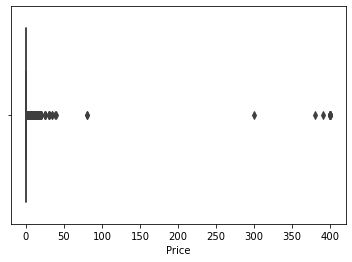

In [190]:
sns.boxplot(x='Price',data=Gstore)

****Result:Prices above $50 dollars are outliers as they do not occur often****

Boxplot for Reviews

Are there any apps with very high number of reviews? Do the values seem right?

<AxesSubplot:xlabel='Reviews'>

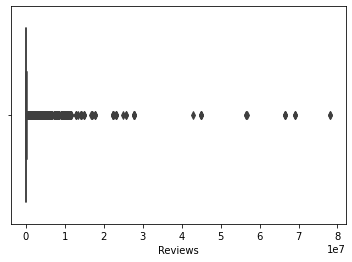

In [191]:
sns.boxplot(x='Reviews',data=Gstore)


**Result:it appears as the apps that are priced at 0 being free had the highest ratings.
    This seems right as people would tend to rate unpaid services fairly**

Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?

(array([  17.,   18.,   39.,   73.,  132.,  438.,  833., 1491., 3447.,
        1695.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

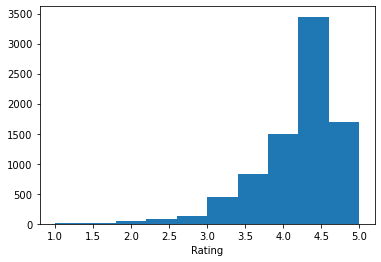

In [101]:
plt.xlabel('Rating')
plt.hist('Rating',data=Gstore2)

**Result:majority of the ratings are at 4.5 which is quite high**

Histogram for Size

Note down your observations for the plots made above. Which of these seem to have outliers?

(array([4195., 1232.,  913.,  560.,  417.,  269.,  193.,  132.,  109.,
         163.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <BarContainer object of 10 artists>)

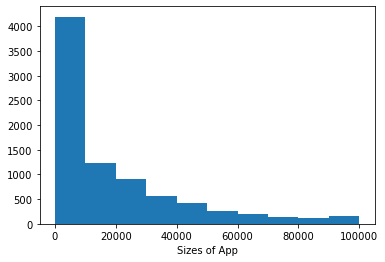

In [102]:
plt.xlabel('Sizes of App')
plt.hist(x='Size',data=Gstore2)

**Result: Large app with sizes over 40000 are downloaded less than 500 times**

6. Outlier treatment: 

6a. Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?

Drop these as most seem to be junk apps

In [103]:
Gstore2[Gstore2['Price']>=200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [104]:
Gstore2=Gstore2.drop(Gstore2[Gstore2['Price']>=200].index)

In [105]:
Gstore2[Gstore2['Price']>=200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


**Result: few of the apps are priced above 200 and so it is indeed a high price.**

6b. Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [106]:
Gstore2[Gstore2['Reviews']>2e6]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724.0,0.0,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,0.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,0.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324.0,0.0,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8445,FIFA Soccer,SPORTS,4.2,3909032.0,51000.0,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",10.5.00,4.1 and up
8896,DU Battery Saver - Battery Charger & Battery Life,TOOLS,4.5,13479633.0,14000.0,100000000,Free,0.0,Everyone,Tools,"June 5, 2018",4.8.7.8,4.0 and up
9140,EA SPORTS UFC®,SPORTS,4.5,2371338.0,37000.0,50000000,Free,0.0,Teen,Sports,"July 24, 2017",1.9.3097721,2.3.3 and up
9142,Need for Speed™ No Limits,GAME,4.4,3344300.0,22000.0,50000000,Free,0.0,Everyone 10+,Racing,"July 24, 2018",2.12.1,4.1 and up


In [110]:
Gstore2=Gstore2.drop(Gstore2[Gstore2['Reviews']>2e6].index)

In [111]:
Gstore2[Gstore2['Reviews']>2e6]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [112]:
Gstore2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Result: Reviews with over 2million has been dropped**

6c. Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than than that

In [113]:
Gstore2['Installs'].quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99])

0.10        1000.0
0.25       10000.0
0.50      100000.0
0.70     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    50000000.0
Name: Installs, dtype: float64

In [114]:
Gstore2[Gstore2['Installs']>1e7] #decided to delete Installs greater that 10million as 95% of the apps are within this range

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080.0,0.0,100000000,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,0.0,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730.0,0.0,50000000,Free,0.0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730.0,0.0,50000000,Free,0.0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334.0,27000.0,50000000,Free,0.0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136.0,54000.0,50000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613.0,21000.0,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up
10549,Toy Truck Rally 3D,GAME,4.0,301895.0,25000.0,50000000,Free,0.0,Everyone,Racing,"May 23, 2018",1.4.4,4.1 and up


In [115]:
Gstore2=Gstore2.drop(Gstore2[Gstore2['Installs']>1e7].index)

In [116]:
Gstore2[Gstore2['Installs']>1e7]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

7a. Make scatter plot/joinplot for Rating vs. Price
What pattern do you observe? Does rating increase with price?

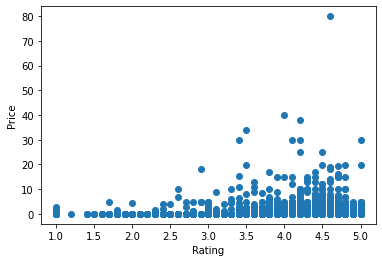

In [118]:
plt.xlabel('Rating')
plt.ylabel('Price')
plt.scatter(Gstore2['Rating'],Gstore2['Price'])

**Result: 1. prices of app below 20 get reviews that exceed ratings of 3 regularly**

**2. prices of app between 20 and 20 do not have any low reviews, few reviews but within the range of 3 and 5**
          
          
**3. prices of app 40 and above hardly get any reviews**

7b. Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

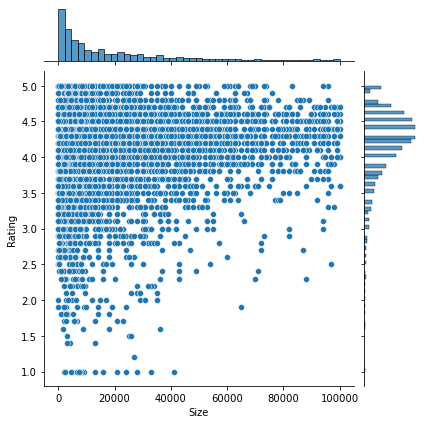

In [119]:
sns.jointplot(x='Size', y='Rating', data=Gstore2)

**Result: Apps with sizes above 70,000 have all their ratings above 2 while sizes with 40,000 and mix of ratings between 1 and 5**

7c. Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

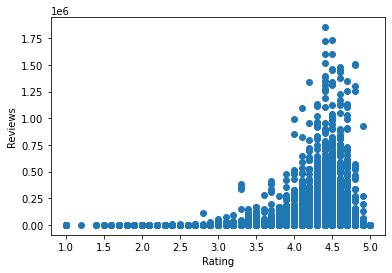

In [120]:
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.scatter(Gstore2['Rating'],Gstore2['Reviews'])

**Result: Reviews are the highest for ratings above 4**

7d. Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

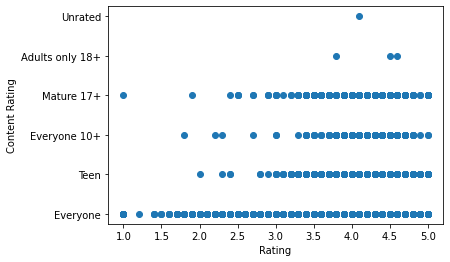

In [121]:
plt.xlabel('Rating')
plt.ylabel('Content Rating')
plt.scatter(Gstore2['Rating'],Gstore2['Content Rating'])

**Result: Content rating of Adults only 18+ are hardly rated but the few ratings are 3.5 and above. Content rating for everyone has a lot of reviews but ranged both low at 1 and high at 5**

7e.Make boxplot for Ratings vs. Category

Which genre has the best ratings?

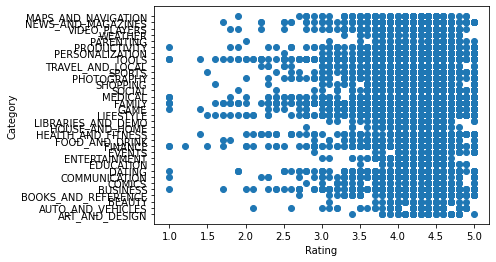

In [209]:
plt.xlabel('Rating')
plt.ylabel('Category')
plt.scatter(Gstore['Rating'],Gstore['Category'])

**No genre has the highest rating as most of the genre have ratings of 5**

8. Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

8a. Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [122]:
inp1=Gstore2.copy()

In [123]:
inp1['Reviews']=np.log1p(inp1['Reviews'])
inp1['Reviews']

0         5.075174
1         6.875232
2        11.379520
4         6.875232
5         5.123964
           ...    
10834     2.079442
10836     3.663562
10837     1.609438
10839     4.744932
10840    12.894981
Name: Reviews, Length: 7726, dtype: float64

In [124]:
Gstore['Reviews']

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10834         7.0
10836        38.0
10837         4.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 9353, dtype: float64

In [125]:
inp1['Installs']=np.log1p(inp1['Installs'])
inp1['Installs']

0         9.210440
1        13.122365
2        15.424949
4        11.512935
5        10.819798
           ...    
10834     6.216606
10836     8.517393
10837     4.615121
10839     6.908755
10840    16.118096
Name: Installs, Length: 7726, dtype: float64

In [126]:
Gstore['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9353, dtype: int64

8b. Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [127]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,2.079442,2600.0,6.216606,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,3.663562,53000.0,8.517393,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.609438,3600.0,4.615121,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,4.744932,0.0,6.908755,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [128]:
inp1=inp1.drop(['App','Last Updated','Current Ver','Android Ver','Type'],axis=1)
inp1

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,2.079442,2600.0,6.216606,0.0,Everyone,Education
10836,FAMILY,4.5,3.663562,53000.0,8.517393,0.0,Everyone,Education
10837,FAMILY,5.0,1.609438,3600.0,4.615121,0.0,Everyone,Education
10839,BOOKS_AND_REFERENCE,4.5,4.744932,0.0,6.908755,0.0,Mature 17+,Books & Reference


Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [129]:
inp1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [130]:
inp1['Content Rating']

0          Everyone
1          Everyone
2          Everyone
4          Everyone
5          Everyone
            ...    
10834      Everyone
10836      Everyone
10837      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 7726, dtype: object

In [131]:
dummies=pd.get_dummies(inp1[['Category','Genres','Content Rating']],drop_first=True)
dummies

,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10839,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [132]:
inp2=pd.concat([inp1.drop(['Category','Genres','Content Rating'],axis=1),dummies],axis=1)
inp2

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,2.079442,2600.0,6.216606,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,4.5,3.663562,53000.0,8.517393,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,5.0,1.609438,3600.0,4.615121,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10839,4.5,4.744932,0.0,6.908755,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [133]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word', 'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated'],
      dtype='object', length=155)

10. Separate the dataframes into X_train, y_train, X_test, and y_test.

11 . Model building

Use linear regression as the technique

Report the R2 on the train set

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train,X_test,y_train,y_test=train_test_split(inp2.drop(['Rating'],axis=1),inp2['Rating'],test_size=0.3,random_state=5)

In [136]:
y_test

4540    4.1
488     4.4
2068    4.2
109     4.2
8857    1.6
       ... 
526     4.2
3169    4.3
4690    3.6
9791    4.2
3817    4.5
Name: Rating, Length: 2318, dtype: float64

In [137]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [138]:
R2_train=round(lm.score(X_train,y_train),3)
print('The R2 value of the training set is:{}'.format(R2_train))

The R2 value of the training set is:0.162


In [139]:
R2_train=round(lm.score(X_test, y_test),3)
print('The R2 value of the test set is:{}'.format(R2_train))

The R2 value of the test set is:0.121


In [140]:
for j in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(inp2.drop(['Rating'],axis=1),inp2['Rating'],test_size=0.3,random_state=j)
    lm=LinearRegression()
    lm.fit(X_train,y_train)
    if lm.score(X_test,y_test)>lm.score(X_train,y_train):
        print(lm.score(X_test,y_test),lm.score(X_train,y_train),j)

0.15226703142599163 0.14760002059596422 0
0.1492381448533222 0.1488570459581926 8
0.15308861702381493 0.1465553954765696 11
0.15271183957533996 0.1453260792104878 15
0.15495181433102068 0.14567204991648253 19
0.15259551258572313 0.14687157473051748 32
0.1496666819040462 0.14806383219805985 49
0.15489421914483925 0.14715955796337954 57
0.15302949570301105 0.14781954821291465 58
0.15546025414893128 0.1448678952290896 69
0.15772597496763252 0.14372058548143563 84
0.15073724134611 0.14912517654896762 152
0.15977342783926762 0.14470214567152406 174
0.1548545719282739 0.1457727612549219 183
0.15129805424799192 0.1478055179751765 190
0.15127931534045314 0.14724265733493258 192
0.1506993136599747 0.14873076204861813 201
0.15316468854391097 0.1464907104359684 210
0.15749186826559203 0.14553987289045878 223
0.14852189531999527 0.14807891745802193 229
0.15451616931838708 0.14648670402381125 258
0.155486860514371 0.14462968836243117 267
0.14976458724160202 0.14740016050000015 284
0.157050232495448

12. Make predictions on test set and report R2.



In [141]:
X_train.iloc[0:1,:]

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
3257,12.662187,8500.0,16.118096,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [142]:
y_train[8484]

4.4

In [143]:
lm.predict(X_train)[0]

4.2509242301110755

**Result: The prediction works great as the answer is similar to the original data.
    Based on our lm score, we can predict the entire data with less than 20% of the database.**